In [134]:
# ------------------------------------------------------------
# LSTM
# ------------------------------------------------------------
# ---------------------------------------------------------
# If you are running in a Jupyter or Colab environment,
# install 'fredapi' first by uncommenting the following line:
# !pip install fredapi
# ---------------------------------------------------------

!pip install fredapi

import pandas as pd
import numpy as np
from fredapi import Fred
import os

pd.options.display.max_columns = None

In [136]:
# 1. Your FRED API key
fred_api_key = "a051f637ff06f722b6837a28d9a45e85"
fred = Fred(api_key=fred_api_key)

In [138]:
# 2. Dictionary of ~100 FRED series (some may not be strictly "daily" or fully active)
fred_series_ids = {
    # 1–11: Treasury Constant Maturity Rates (Daily)
    "DGS1MO": "1-Month Treasury Constant Maturity Rate",
    "DGS3MO": "3-Month Treasury Constant Maturity Rate",
    "DGS6MO": "6-Month Treasury Constant Maturity Rate",
    "DGS1": "1-Year Treasury Constant Maturity Rate",
    "DGS2": "2-Year Treasury Constant Maturity Rate",
    "DGS3": "3-Year Treasury Constant Maturity Rate",
    "DGS5": "5-Year Treasury Constant Maturity Rate",
    "DGS7": "7-Year Treasury Constant Maturity Rate",
    "DGS10": "10-Year Treasury Constant Maturity Rate",
    "DGS20": "20-Year Treasury Constant Maturity Rate",
    "DGS30": "30-Year Treasury Constant Maturity Rate",

    # 12–14: T-Bill Secondary Market Rates (Daily)
    "DTB4WK": "4-Week Treasury Bill: Secondary Market Rate",
    "DTB3": "3-Month Treasury Bill: Secondary Market Rate",
    "DTB6": "6-Month Treasury Bill: Secondary Market Rate",

    # 15–19: Corporate Bond Spreads (Daily)
    "BAMLH0A0HYM2": "ICE BofA US High Yield Master II OAS",
    "BAMLCC0A1AA": "ICE BofA AAA US Corporate Index OAS",
    "BAMLCC0A3A": "ICE BofA Single-A US Corporate Index OAS",
    "BAMLCC0A4BBB": "ICE BofA BBB US Corporate Index OAS",
    "BAMLCC0A5BB": "ICE BofA BB US Corporate Index OAS",

    # 20–26: Federal Funds, Bank, and Repo Rates (Daily)
    "EFFR": "Effective Federal Funds Rate",
    "IORR": "Interest Rate on Reserve Balances (IORR)",
    "IOER": "Interest Rate on Excess Reserves (Discontinued)",
    "OBFR": "Overnight Bank Funding Rate",
    "SOFR": "Secured Overnight Financing Rate",
    "TEDRATE": "TED Spread",
    "RRPONTSYD": "Overnight Reverse Repurchase Agreements Award Rate",

    # 27–31: LIBOR (Daily)
    "USD1MTD156N": "1-Month LIBOR (USD)",
    "USD3MTD156N": "3-Month LIBOR (USD)",
    "USD6MTD156N": "6-Month LIBOR (USD)",
    "GBP1MTD156N": "1-Month LIBOR (GBP)",
    "GBP3MTD156N": "3-Month LIBOR (GBP)",

    # 32–45: Exchange Rates (Daily, “DEX” prefix from FRED)
    "DEXUSEU": "U.S. Dollar to Euro Exchange Rate",
    "DEXJPUS": "U.S. Dollar to Japanese Yen Exchange Rate",
    "DEXUSUK": "U.S. Dollar to U.K. Pound Sterling Exchange Rate",
    "DEXCAUS": "Canadian Dollar to U.S. Dollar Exchange Rate",
    "DEXCHUS": "Chinese Yuan to U.S. Dollar Exchange Rate",
    "DEXMXUS": "Mexican Peso to U.S. Dollar Exchange Rate",
    "DEXKOUS": "South Korean Won to U.S. Dollar Exchange Rate",
    "DEXBZUS": "Brazilian Real to U.S. Dollar Exchange Rate",
    "DEXARUS": "Argentine Peso to U.S. Dollar Exchange Rate",
    "DEXINUS": "Indian Rupee to U.S. Dollar Exchange Rate",
    "DEXSZUS": "Swiss Franc to U.S. Dollar Exchange Rate",
    "DEXSIUS": "Singapore Dollar to U.S. Dollar Exchange Rate",
    "DEXHKUS": "Hong Kong Dollar to U.S. Dollar Exchange Rate",
    "DEXTAUS": "New Taiwan Dollar to U.S. Dollar Exchange Rate",

    # 46–49: Additional Exchange Rates
    "DEXTHUS": "Thai Baht to U.S. Dollar Exchange Rate",
    "DEXSDUS": "Swedish Krona to U.S. Dollar Exchange Rate",
    "DEXSLUS": "Sri Lankan Rupee to U.S. Dollar Exchange Rate",
    "DEXNOUS": "Norwegian Krone to U.S. Dollar Exchange Rate",

    # 50–54: Key Commodities (Daily)
    "DCOILWTICO": "Crude Oil Prices: WTI",
    "DCOILBRENTEU": "Crude Oil Prices: Brent - Europe",
    "GOLDAMGBD228NLBM": "Gold Fixing Price 10:30 A.M. (London)",
    "SLVPRUSD": "Silver Price (check if truly daily)",
    "DHHNGSP": "Henry Hub Natural Gas Spot Price",

    # 55: Jet Fuel (Daily)
    "DJFUELUSGULF": "U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price",

    # 56–60: Equity Indexes (Daily)
    "SP500": "S&P 500 Index",
    "VIXCLS": "CBOE Volatility Index (VIX)",
    "NASDAQCOM": "NASDAQ Composite Index",
    "DJIA": "Dow Jones Industrial Average",
    "WILL5000IND": "Wilshire 5000 Total Market Index",

    # 61–65: ICE BofA Corporate Yields (Daily)
    "BAMLC0A1CAAAEY": "ICE BofA AAA US Corp Index Effective Yield",
    "BAMLC0A2CAAEY": "ICE BofA AA US Corp Index Effective Yield",
    "BAMLC0A3CAEY": "ICE BofA Single-A US Corp Index Effective Yield",
    "BAMLC0A4CBBBEY": "ICE BofA BBB US Corp Index Effective Yield",
    "BAMLH0A0HYBBEY": "ICE BofA US High Yield Master II Effective Yield",

    # 66: Bank Prime Loan Rate (Daily updates only when changed)
    "DPRIME": "Bank Prime Loan Rate",

    # 67–71: More LIBOR variants (Daily)
    "GBP6MTD156N": "6-Month LIBOR (GBP)",
    "CHF3MTD156N": "3-Month LIBOR (CHF)",
    "JPN3MTD156N": "3-Month LIBOR (JPY)",
    "EUR3MTD156N": "3-Month LIBOR (EUR)",
    "USDONTD156N": "Overnight LIBOR (USD)",

    # 72–76: Additional “DEX” exchange rates
    "DEXDNUS": "Danish Krone to U.S. Dollar Exchange Rate",
    "DEXALUS": "Albanian Lek to U.S. Dollar Exchange Rate",
    "DEXCZHUS": "Czech Koruna to U.S. Dollar Exchange Rate",
    "DEXMAUS": "Moroccan Dirham to U.S. Dollar Exchange Rate",
    "DEXPLUS": "Polish Zloty to U.S. Dollar Exchange Rate",

    # 77–79: More daily rates/spreads
    "BAMLH0A1CAAEY": "ICE BofA CCC & Lower US High Yield Index Effective Yield",
    "T10YIE": "10-Year Breakeven Inflation Rate",
    "T5YIE": "5-Year Breakeven Inflation Rate",

    # 80–82: Treasury Inflation-Indexed Security (TIPS) Yields (Daily)
    "DFII5": "5-Year TIPS Yield",
    "DFII10": "10-Year TIPS Yield",
    "DFII30": "30-Year TIPS Yield",

    # 83–92: ICE Swap Rates (Daily, if available)
    "ICERATES1100USD1Y": "1-Year ICE Swap Rate (USD)",
    "ICERATES1100USD2Y": "2-Year ICE Swap Rate (USD)",
    "ICERATES1100USD3Y": "3-Year ICE Swap Rate (USD)",
    "ICERATES1100USD5Y": "5-Year ICE Swap Rate (USD)",
    "ICERATES1100USD7Y": "7-Year ICE Swap Rate (USD)",
    "ICERATES1100USD10Y": "10-Year ICE Swap Rate (USD)",
    "ICERATES1100USD30Y": "30-Year ICE Swap Rate (USD)",
    "BAMLH0A3HYCEY": "ICE BofA Single-B US High Yield Index Effective Yield",
    "T20YIEM": "20-Year Breakeven Inflation Rate (check freq)",
    "DHOILNYH": "No. 2 Heating Oil, New York Harbor (check daily)",

    # 93–100: Fillers (some not daily!)
    "DGASSP": "Gasoline Spot Price (US Average, check freq)",
    "MICH": "U of Michigan: Consumer Sentiment (likely monthly)",
    "ICSA": "Initial Jobless Claims (weekly)",
    "WALCL": "Fed Assets (weekly)",
    "CPIAUCSL": "CPI for All Urban Consumers (monthly)",
    "GS10": "10-Year Treasury (alias for DGS10?)",
    "T7YIE": "7-Year Breakeven Inflation Rate (check freq)",
    "PNAPETHUSDM": "Palladium Price (check freq)"
}

In [140]:
# Chosen explanatory variables
fred_series = {
    # 1–11: Treasury Constant Maturity Rates (Daily)
    "DGS1MO": "1-Month Treasury Constant Maturity Rate",
    "DGS6MO": "6-Month Treasury Constant Maturity Rate",
    "DGS1": "1-Year Treasury Constant Maturity Rate",
    "DGS5": "5-Year Treasury Constant Maturity Rate",
    "DGS10": "10-Year Treasury Constant Maturity Rate",
    "DGS30": "30-Year Treasury Constant Maturity Rate",

    # 12–14: T-Bill Secondary Market Rates (Daily)
    "DTB4WK": "4-Week Treasury Bill: Secondary Market Rate",
    "DTB3": "3-Month Treasury Bill: Secondary Market Rate",
    "DTB6": "6-Month Treasury Bill: Secondary Market Rate",

    # 15–19: Corporate Bond Spreads (Daily)
    "BAMLCC0A1AA": "ICE BofA AAA US Corporate Index OAS",

    # 20–26: Federal Funds, Bank, and Repo Rates (Daily)
    "EFFR": "Effective Federal Funds Rate",
    "IORR": "Interest Rate on Reserve Balances (IORR)",
    "OBFR": "Overnight Bank Funding Rate",
    "TEDRATE": "TED Spread",
    "RRPONTSYD": "Overnight Reverse Repurchase Agreements Award Rate",

    # 50–54: Key Commodities (Daily)
    "DCOILWTICO": "Crude Oil Prices: WTI",
    "GOLDAMGBD228NLBM": "Gold Fixing Price 10:30 A.M. (London)",
    "DHHNGSP": "Henry Hub Natural Gas Spot Price",

    # 55: Jet Fuel (Daily)
    "DJFUELUSGULF": "U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price",

    # 56–60: Equity Indexes (Daily)
    "SP500": "S&P 500 Index",
    "VIXCLS": "CBOE Volatility Index (VIX)",

    # 61–65: ICE BofA Corporate Yields (Daily)
    "BAMLC0A1CAAAEY": "ICE BofA AAA US Corp Index Effective Yield",

    # 66: Bank Prime Loan Rate (Daily updates only when changed)
    "DPRIME": "Bank Prime Loan Rate",

    # 80–82: Treasury Inflation-Indexed Security (TIPS) Yields (Daily)
    "DFII5": "5-Year TIPS Yield",
    "DFII10": "10-Year TIPS Yield",
    "DFII30": "30-Year TIPS Yield",

    # 93–100: Fillers (some not daily!)
    "MICH": "U of Michigan: Consumer Sentiment (likely monthly)",
    "ICSA": "Initial Jobless Claims (weekly)",
    "CPIAUCSL": "CPI for All Urban Consumers (monthly)",
    "GS10": "10-Year Treasury (alias for DGS10?)"
}

In [142]:
# 3. Define the date range for the last 10 years
end_date = pd.Timestamp.today().normalize()
start_date = end_date - pd.Timedelta(days=3650)

In [144]:
# 4. Create a date index for daily frequency over the last year
date_index = pd.date_range(start=start_date, end=end_date, freq='D')

In [146]:
# 5. Create an empty DataFrame with this daily index to combine all valid series
combined_df = pd.DataFrame(index=date_index)

for series_id, description in fred_series.items():
    print(f"Downloading {series_id} ({description})...")
    try:
        # Fetch data for the last year
        data = fred.get_series(
            series_id,
            observation_start=start_date.strftime('%Y-%m-%d'),
            observation_end=end_date.strftime('%Y-%m-%d')
        )

        # If there's no data returned at all, skip
        if data is None or data.empty:
            print(f" -> No data returned for {series_id}, skipping.\n")
            continue

        # Put into a DataFrame and reindex to daily
        df_series = pd.DataFrame(data, columns=[series_id])
        df_series.index.name = "DATE"
        df_series = df_series.reindex(combined_df.index)  # do not fill yet

        '''# Check how many missing values (before fill)
        missing_count = df_series[series_id].isna().sum()
        if missing_count > 100:
            print(f" -> {series_id} has {missing_count} NaNs (>100). Dropping.\n")
            continue

        # Forward-fill now
        df_series.ffill(inplace=True)

        # If after filling, all remain NaN, skip
        if df_series[series_id].isna().all():
            print(f" -> {series_id} is still all NaN after ffill, skipping.\n")
            continue
        '''
        # Otherwise, add this to the combined DataFrame
        combined_df[series_id] = df_series[series_id]
        print(f" -> {series_id} added.\n")
    except Exception as e:
        print(f"Failed to download {series_id}. Error: {e}\n")

 -> DGS1MO added.

 -> DGS6MO added.

 -> DGS1 added.

 -> DGS5 added.

 -> DGS10 added.

 -> DGS30 added.

 -> DTB4WK added.

 -> DTB3 added.

 -> DTB6 added.

Failed to download BAMLCC0A1AA. Error: Bad Request.  The series does not exist.

 -> EFFR added.

 -> IORR added.

 -> OBFR added.

 -> TEDRATE added.

 -> RRPONTSYD added.

 -> DCOILWTICO added.

Failed to download GOLDAMGBD228NLBM. Error: Bad Request.  The series does not exist.

 -> DHHNGSP added.

 -> DJFUELUSGULF added.

 -> SP500 added.

 -> VIXCLS added.

 -> BAMLC0A1CAAAEY added.

 -> DPRIME added.

 -> DFII5 added.

 -> DFII10 added.

 -> DFII30 added.

 -> MICH added.

 -> ICSA added.

 -> CPIAUCSL added.

 -> GS10 added.



In [148]:
combined_df

,DGS1MO,DGS6MO,DGS1,DGS5,DGS10,DGS30,DTB4WK,DTB3,DTB6,EFFR,IORR,OBFR,TEDRATE,RRPONTSYD,DCOILWTICO,DHHNGSP,DJFUELUSGULF,SP500,VIXCLS,BAMLC0A1CAAAEY,DPRIME,DFII5,DFII10,DFII30,MICH,ICSA,CPIAUCSL,GS10
2015-05-12,0.01,0.09,0.25,1.58,2.28,3.02,0.01,0.03,0.09,0.13,0.25,NaN,0.25,81.378,60.72,2.85,1.883,2099.12,13.86,2.67,3.25,-0.07,0.40,0.99,NaN,NaN,NaN,NaN
2015-05-13,0.02,0.09,0.24,1.57,2.27,3.07,0.02,0.02,0.09,0.13,0.25,NaN,0.25,92.129,60.50,2.85,1.889,2098.48,13.76,2.67,3.25,-0.10,0.41,1.04,NaN,NaN,NaN,NaN
2015-05-14,0.00,0.08,0.23,1.51,2.23,3.03,0.00,0.01,0.08,0.13,0.25,NaN,0.27,61.513,59.89,2.87,1.896,2121.10,12.74,2.63,3.25,-0.14,0.36,1.03,NaN,NaN,NaN,NaN
2015-05-15,0.02,0.09,0.23,1.46,2.14,2.93,0.02,0.02,0.09,0.13,0.25,NaN,0.26,76.249,59.73,2.96,1.889,2122.73,12.38,2.57,3.25,-0.16,0.31,0.94,NaN,NaN,NaN,NaN
2015-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-05,4.38,4.27,4.02,3.95,4.36,4.83,4.24,4.22,4.09,4.33,NaN,4.33,NaN,124.690,58.50,3.26,1.866,5650.38,23.64,4.80,7.50,1.62,2.08,2.58,NaN,NaN,NaN,NaN
2025-05-06,4.37,4.25,3.98,3.90,4.30,4.81,4.23,4.22,4.08,4.33,NaN,4.33,NaN,129.858,NaN,NaN,NaN,5606.91,24.76,4.77,7.50,1.56,2.04,2.56,NaN,NaN,NaN,NaN
2025-05-07,4.37,4.27,4.00,3.87,4.26,4.77,4.22,4.22,4.09,4.33,NaN,4.33,NaN,154.859,NaN,NaN,NaN,5631.28,23.55,4.74,7.50,1.54,2.01,2.54,NaN,NaN,NaN,NaN
2025-05-08,4.37,4.28,4.05,4.00,4.37,4.83,4.23,4.23,4.11,4.33,NaN,4.33,NaN,139.768,NaN,NaN,NaN,5663.94,22.48,4.82,7.50,1.61,2.08,2.59,NaN,NaN,NaN,NaN


In [150]:
missing_count = combined_df.isna().sum()
missing_count

DGS1MO            1152
DGS6MO            1152
DGS1              1152
DGS5              1152
DGS10             1152
DGS30             1152
DTB4WK            1152
DTB3              1152
DTB6              1152
EFFR              1140
IORR              1381
OBFR              1341
TEDRATE           2005
RRPONTSYD         1158
DCOILWTICO        1151
DHHNGSP           1128
DJFUELUSGULF      1153
SP500             1137
VIXCLS            1115
BAMLC0A1CAAAEY    1041
DPRIME            1123
DFII5             1152
DFII10            1152
DFII30            1152
MICH              3533
ICSA              3130
CPIAUCSL          3533
GS10              3532
dtype: int64

In [152]:
combined_df.bfill(inplace=True)

In [154]:
combined_df.ffill(inplace=True)

In [156]:
missing_count = combined_df.isna().sum()
missing_count

DGS1MO            0
DGS6MO            0
DGS1              0
DGS5              0
DGS10             0
DGS30             0
DTB4WK            0
DTB3              0
DTB6              0
EFFR              0
IORR              0
OBFR              0
TEDRATE           0
RRPONTSYD         0
DCOILWTICO        0
DHHNGSP           0
DJFUELUSGULF      0
SP500             0
VIXCLS            0
BAMLC0A1CAAAEY    0
DPRIME            0
DFII5             0
DFII10            0
DFII30            0
MICH              0
ICSA              0
CPIAUCSL          0
GS10              0
dtype: int64

In [158]:
# Move target variable 'SP500' to the last column
col = 'SP500'
combined_df = combined_df[[c for c in combined_df.columns if c != col] + [col]]

combined_df

,DGS1MO,DGS6MO,DGS1,DGS5,DGS10,DGS30,DTB4WK,DTB3,DTB6,EFFR,IORR,OBFR,TEDRATE,RRPONTSYD,DCOILWTICO,DHHNGSP,DJFUELUSGULF,VIXCLS,BAMLC0A1CAAAEY,DPRIME,DFII5,DFII10,DFII30,MICH,ICSA,CPIAUCSL,GS10,SP500
2015-05-12,0.01,0.09,0.25,1.58,2.28,3.02,0.01,0.03,0.09,0.13,0.25,0.37,0.25,81.378,60.72,2.85,1.883,13.86,2.67,3.25,-0.07,0.40,0.99,2.7,276000.0,237.657,2.36,2099.12
2015-05-13,0.02,0.09,0.24,1.57,2.27,3.07,0.02,0.02,0.09,0.13,0.25,0.37,0.25,92.129,60.50,2.85,1.889,13.76,2.67,3.25,-0.10,0.41,1.04,2.7,276000.0,237.657,2.36,2098.48
2015-05-14,0.00,0.08,0.23,1.51,2.23,3.03,0.00,0.01,0.08,0.13,0.25,0.37,0.27,61.513,59.89,2.87,1.896,12.74,2.63,3.25,-0.14,0.36,1.03,2.7,276000.0,237.657,2.36,2121.10
2015-05-15,0.02,0.09,0.23,1.46,2.14,2.93,0.02,0.02,0.09,0.13,0.25,0.37,0.26,76.249,59.73,2.96,1.889,12.38,2.57,3.25,-0.16,0.31,0.94,2.7,276000.0,237.657,2.36,2122.73
2015-05-16,0.01,0.08,0.22,1.54,2.23,3.02,0.01,0.02,0.08,0.13,0.25,0.37,0.26,135.397,59.44,3.01,1.871,12.73,2.64,3.25,-0.10,0.37,1.02,2.7,276000.0,237.657,2.36,2129.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-05,4.38,4.27,4.02,3.95,4.36,4.83,4.24,4.22,4.09,4.33,0.15,4.33,0.09,124.690,58.50,3.26,1.866,23.64,4.80,7.50,1.62,2.08,2.58,5.0,228000.0,319.615,4.28,5650.38
2025-05-06,4.37,4.25,3.98,3.90,4.30,4.81,4.23,4.22,4.08,4.33,0.15,4.33,0.09,129.858,58.50,3.26,1.866,24.76,4.77,7.50,1.56,2.04,2.56,5.0,228000.0,319.615,4.28,5606.91
2025-05-07,4.37,4.27,4.00,3.87,4.26,4.77,4.22,4.22,4.09,4.33,0.15,4.33,0.09,154.859,58.50,3.26,1.866,23.55,4.74,7.50,1.54,2.01,2.54,5.0,228000.0,319.615,4.28,5631.28
2025-05-08,4.37,4.28,4.05,4.00,4.37,4.83,4.23,4.23,4.11,4.33,0.15,4.33,0.09,139.768,58.50,3.26,1.866,22.48,4.82,7.50,1.61,2.08,2.59,5.0,228000.0,319.615,4.28,5663.94


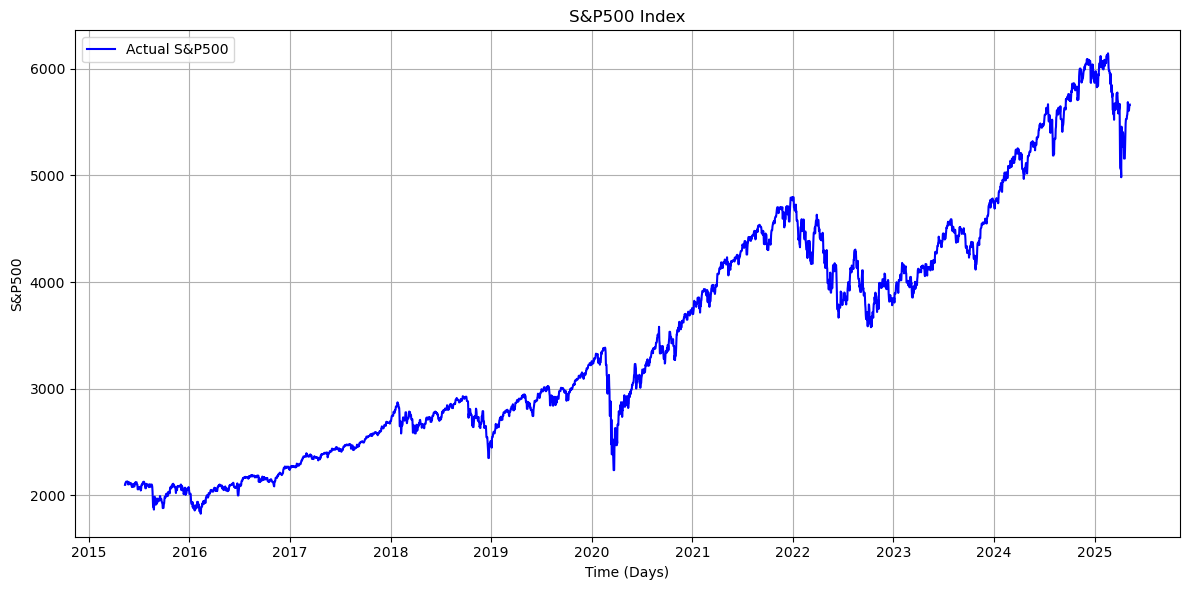

In [160]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(combined_df["SP500"], label='Actual S&P500', color='blue')
plt.title("S&P500 Index")
plt.xlabel("Time (Days)")
plt.ylabel("S&P500")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# 7. Save to a single CSV
output_filename = "fred_combined_2022-2023.csv"
combined_df = combined_df.loc["2022-01-01":"2023-01-31"]

# Save to CSV
combined_df.to_csv(output_filename, index_label="DATE")

print(f"Filtered data saved to '{output_filename}'.")

Filtered data saved to 'fred_combined_2022-2023.csv'.


In [162]:
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import math

pd.options.display.max_columns = None

In [164]:
# 8. Split and Scale for train/val/test
num_points = len(combined_df)
train_end = int(num_points * 0.80)
val_end   = int(num_points * 0.90)

train_data = combined_df[:train_end]
val_data   = combined_df[train_end:val_end]
test_data  = combined_df[val_end:]

# Fit a MinMaxScaler on training data 
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(train_data.values)

scaler_y = MinMaxScaler()
scaler_y.fit(train_data[["SP500"]].values)

# Transform all splits
train_scaled = scaler.transform(train_data.values)
val_scaled   = scaler.transform(val_data.values)
test_scaled  = scaler.transform(test_data.values)

sp500_index = combined_df.columns.get_loc("SP500")

# Sequence creation function
def create_sequences(data_array, seq_length, target_index):
    X, y = [], []
    for i in range(seq_length, len(data_array)):
        X.append(data_array[i - seq_length:i])              # (seq_length, features)
        y.append(data_array[i, target_index])               # scalar SP500 value
    return np.array(X), np.array(y).reshape(-1, 1)

# Create sequences
SEQ_LEN = 10
X_train, y_train = create_sequences(train_scaled, SEQ_LEN, sp500_index)
X_val,   y_val   = create_sequences(val_scaled, SEQ_LEN, sp500_index)
X_test,  y_test  = create_sequences(test_scaled, SEQ_LEN, sp500_index)

# Confirm shapes 
print("Training shape:", X_train.shape, "->", y_train.shape)
print("Validation shape:", X_val.shape, "->", y_val.shape)
print("Test shape:", X_test.shape, "->", y_test.shape)

Training shape: (2910, 10, 28) -> (2910, 1)
Validation shape: (355, 10, 28) -> (355, 1)
Test shape: (356, 10, 28) -> (356, 1)


In [166]:
# 9. Define LSTM model
import torch.nn.functional as F

class ManualLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ManualLSTMCell, self).__init__()
        self.hidden_size = hidden_size
        # Combined weight matrices for input and hidden (4*hidden_size each to cover i, f, o, g)
        self.W_x = nn.Linear(input_size, 4 * hidden_size)
        self.W_h = nn.Linear(hidden_size, 4 * hidden_size, bias=False)
        # Separate bias for gates (one combined bias covers both linear outputs)
        self.bias = nn.Parameter(torch.zeros(4 * hidden_size))

    def forward(self, x, h_prev, c_prev):
        # x: (batch, input_size), h_prev: (batch, hidden_size), c_prev: (batch, hidden_size)
        # Compute combined linear transformations
        gates = self.W_x(x) + self.W_h(h_prev) + self.bias
        # Split the combined gate outputs into 4 parts
        i_gate, f_gate, o_gate, g_gate = torch.split(gates, self.hidden_size, dim=1)
        # Apply nonlinearities
        i_gate = torch.sigmoid(i_gate)        # input gate
        f_gate = torch.sigmoid(f_gate)        # forget gate
        o_gate = torch.sigmoid(o_gate)        # output gate
        g_gate = torch.tanh(g_gate)           # candidate cell state
        # Update cell state and hidden state
        c_new = f_gate * c_prev + i_gate * g_gate
        h_new = o_gate * torch.tanh(c_new)
        return h_new, c_new

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = ManualLSTMCell(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        batch_size, seq_len, _ = x.shape
        # Initialize hidden and cell states to zeros
        h = torch.zeros(batch_size, self.hidden_size, device=x.device)
        c = torch.zeros(batch_size, self.hidden_size, device=x.device)
        # Iterate through time steps
        for t in range(seq_len):
            h, c = self.lstm_cell(x[:, t, :], h, c)
        # After the full sequence, use final hidden state to get outputs
        out = self.fc(h)  # shape: (batch, output_size)
        return out

In [168]:
# Convert numpy arrays to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_val_t   = torch.tensor(X_val, dtype=torch.float32)
y_val_t   = torch.tensor(y_val, dtype=torch.float32)
X_test_t  = torch.tensor(X_test, dtype=torch.float32)
y_test_t  = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
batch_size = 64
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, optimizer
input_size = X_train.shape[2]    # 28 features
hidden_size = 64
output_size = y_train.shape[1]   # 1 output
model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Optional: move model to GPU if available for faster training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
X_val_t = X_val_t.to(device)
y_val_t = y_val_t.to(device)

In [170]:
# 10. Training loop
epochs = 50
for epoch in range(1, epochs+1):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        # Forward pass
        output = model(X_batch)
        loss = criterion(output, y_batch)
        # Backpropagation
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)
    train_loss /= len(train_dataset)

    # Compute validation loss
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_t)
        val_loss = criterion(val_pred, y_val_t).item()
    # Print progress every few epochs
    if epoch % 10 == 0 or epoch == epochs:
        print(f"Epoch {epoch:02d}: Train MSE={train_loss:.4f}, Val MSE={val_loss:.4f}")

Epoch 10: Train MSE=0.0003, Val MSE=0.0112
Epoch 20: Train MSE=0.0002, Val MSE=0.0115
Epoch 30: Train MSE=0.0003, Val MSE=0.0141
Epoch 40: Train MSE=0.0002, Val MSE=0.0108
Epoch 50: Train MSE=0.0002, Val MSE=0.0085


In [172]:
# Move test data to device
X_test_t = X_test_t.to(device)
y_test_t = y_test_t.to(device)

# 11. Predict
model.eval()
with torch.no_grad():
    y_pred_t = model(X_test_t)

# Convert predictions and targets to NumPy
y_pred = y_pred_t.cpu().numpy().flatten()
y_true_np = y_test_t.cpu().numpy().flatten()

# Invert normalization using the target scaler
y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_orig = scaler_y.inverse_transform(y_true_np.reshape(-1, 1)).flatten()

In [174]:
# 12. Evaluation
rmse = float(np.sqrt(mean_squared_error(y_true_orig, y_pred_orig)))
mae = mean_absolute_error(y_true_orig, y_pred_orig)
mape = np.mean(np.abs((y_true_orig - y_pred_orig) / y_true_orig)) * 100

print(f"\nTest RMSE: {rmse:,.4f}")
print(f"Test MAE : {mae:,.4f}")
print(f"Test MAPE: {mape:,.2f}%")


Test RMSE: 746.1524
Test MAE : 734.8356
Test MAPE: 12.84%


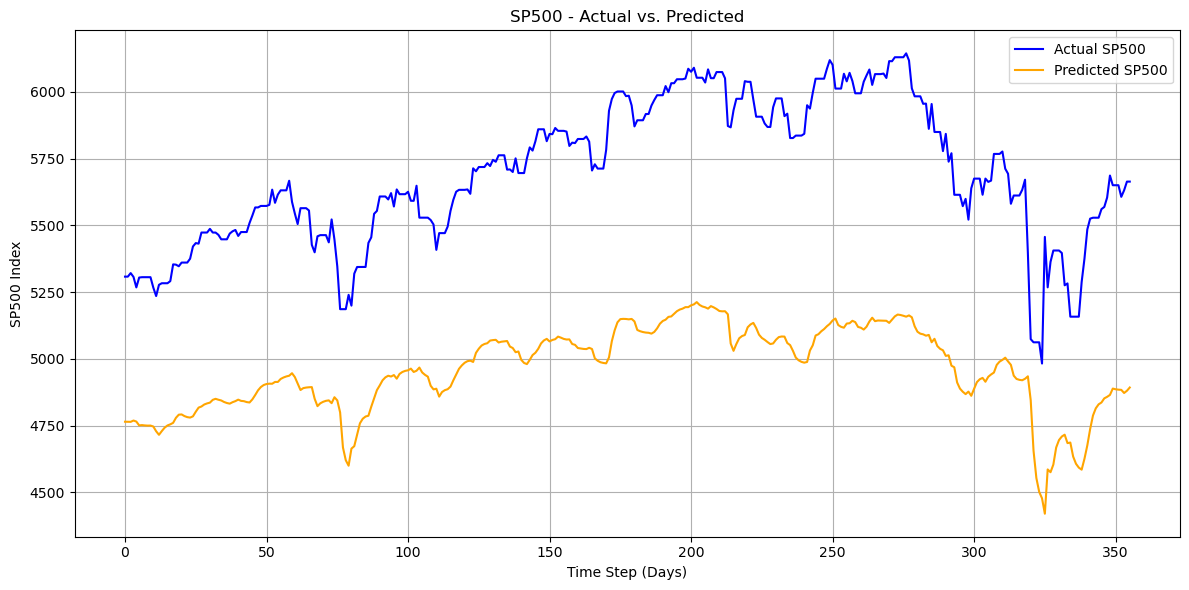

In [176]:
# 13. Plot Actual vs Predicted S&P500 values
plt.figure(figsize=(12, 6))
plt.plot(y_true_orig, label='Actual SP500', color='blue')
plt.plot(y_pred_orig, label='Predicted SP500', color='orange')
plt.title("SP500 - Actual vs. Predicted")
plt.xlabel("Time Step (Days)")
plt.ylabel("SP500 Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [178]:
# ------------------------------------------------------------
# HYPER-PARAMETER TUNING BAYESIAN OPTIMIZATION
# ------------------------------------------------------------
!pip install optuna

import optuna
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [180]:
class ManualLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.W_x = nn.Linear(input_size, 4 * hidden_size)
        self.W_h = nn.Linear(hidden_size, 4 * hidden_size, bias=False)
        self.bias = nn.Parameter(torch.zeros(4 * hidden_size))

    def forward(self, x, h_prev, c_prev):
        gates = self.W_x(x) + self.W_h(h_prev) + self.bias
        i_gate, f_gate, o_gate, g_gate = torch.split(gates, self.hidden_size, dim=1)
        i = torch.sigmoid(i_gate)
        f = torch.sigmoid(f_gate)
        o = torch.sigmoid(o_gate)
        g = torch.tanh(g_gate)
        c = f * c_prev + i * g
        h = o * torch.tanh(c)
        return h, c

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = ManualLSTMCell(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        h = torch.zeros(batch_size, self.hidden_size, device=x.device)
        c = torch.zeros(batch_size, self.hidden_size, device=x.device)
        for t in range(seq_len):
            h, c = self.lstm_cell(x[:, t, :], h, c)
        return self.fc(h)

In [195]:
# --------- Objective Function for Optuna ----------
def objective(trial):
    hidden_size = trial.suggest_int("hidden_size", 32, 128, step=16)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])

    model = LSTMModel(input_size=X_train.shape[2], hidden_size=hidden_size, output_size=1).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    X_val_t = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_t = torch.tensor(y_val, dtype=torch.float32).to(device)

    # Train loop (short for tuning speed)
    for epoch in range(30):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        preds = model(X_val_t).cpu().numpy()
        val_rmse = mean_squared_error(y_val, preds, squared=False)
    return val_rmse

In [197]:
# --------- Run Optuna Search ----------
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# --------- Best Hyperparameters ----------
print("Best Hyperparameters:", study.best_params)

[I 2025-05-09 16:22:48,537] A new study created in memory with name: no-name-e4ed28c4-eeb6-429b-9946-2638e681bb4a
C:\Users\andy_\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-05-09 16:23:01,311] Trial 0 finished with value: 0.14216033138118306 and parameters: {'hidden_size': 48, 'lr': 0.005498982920076428, 'batch_size': 64}. Best is trial 0 with value: 0.14216033138118306.
C:\Users\andy_\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-05-09 16:23:14,650] Trial 1 finished with value: 0.12337103456172491 and parameters: {'hidden_size': 112, 'lr': 0.0012747383187470193, 'batch_s

In [199]:
# Use these from your best Optuna result
best_params = study.best_params
hidden_size = best_params['hidden_size']
lr = best_params['lr']
batch_size = best_params['batch_size']

# Combine training + validation sets for final training
X_full = np.concatenate([X_train, X_val], axis=0)
y_full = np.concatenate([y_train, y_val], axis=0)

# Convert to tensors
X_full_t = torch.tensor(X_full, dtype=torch.float32)
y_full_t = torch.tensor(y_full, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# Final DataLoader
final_loader = DataLoader(TensorDataset(X_full_t, y_full_t), batch_size=batch_size, shuffle=True)

# Reinitialize model
final_model = LSTMModel(input_size=X_full.shape[2], hidden_size=hidden_size, output_size=1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(final_model.parameters(), lr=lr)

# Train on full training set
epochs = 50
for epoch in range(1, epochs+1):
    final_model.train()
    epoch_loss = 0.0
    for xb, yb in final_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = final_model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
    epoch_loss /= len(final_loader.dataset)
    if epoch % 10 == 0 or epoch == epochs:
        print(f"Epoch {epoch:02d} - Train MSE: {epoch_loss:.4f}")

Epoch 10 - Train MSE: 0.0003
Epoch 20 - Train MSE: 0.0003
Epoch 30 - Train MSE: 0.0002
Epoch 40 - Train MSE: 0.0003
Epoch 50 - Train MSE: 0.0002


In [203]:
# Evaluate on test set
final_model.eval()
with torch.no_grad():
    y_pred_test = final_model(X_test_t.to(device)).cpu().numpy().flatten()
    y_true_test = y_test_t.cpu().numpy().flatten()

# Invert normalization
y_pred_orig = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()
y_true_orig = scaler_y.inverse_transform(y_true_test.reshape(-1, 1)).flatten()

# Final metrics
rmse = np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
mae = mean_absolute_error(y_true_orig, y_pred_orig)
mape = np.mean(np.abs((y_true_orig - y_pred_orig) / y_true_orig)) * 100

print(f"\nFinal Test RMSE: {rmse:.4f}")
print(f"Final Test MAE : {mae:.4f}")
print(f"Final Test MAPE: {mape:.2f}%")


Final Test RMSE: 180.1021
Final Test MAE : 144.4036
Final Test MAPE: 2.52%


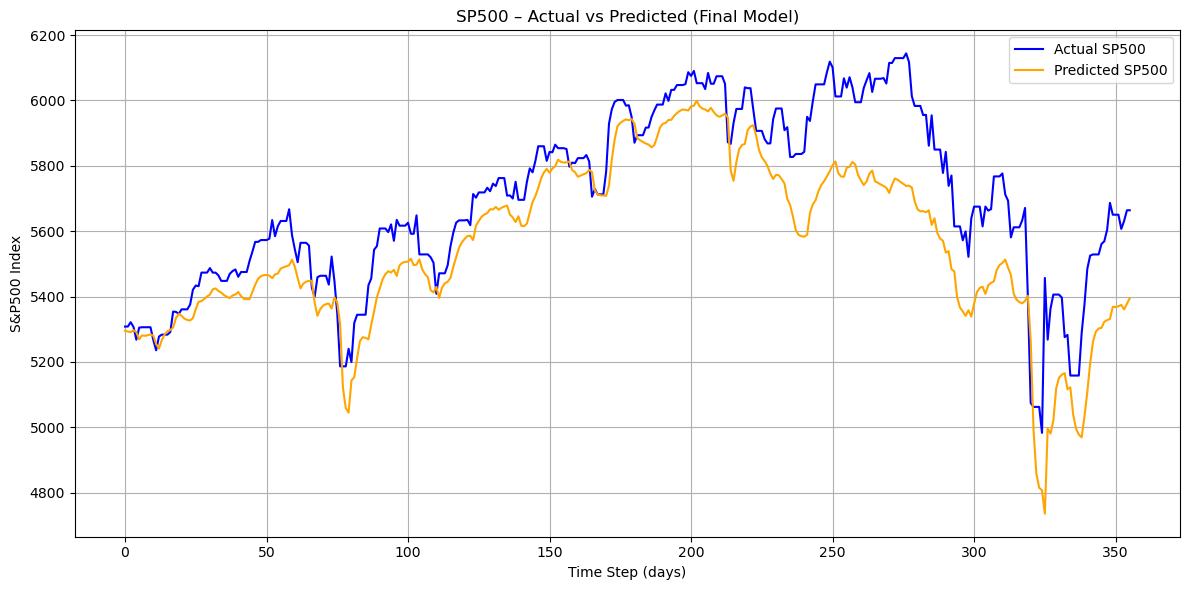

In [207]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_true_orig, label="Actual SP500", color="blue")
plt.plot(y_pred_orig, label="Predicted SP500", color="orange")
plt.title("SP500 – Actual vs Predicted (Final Model)")
plt.xlabel("Time Step (days)")
plt.ylabel("S&P500 Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()